<a href="https://colab.research.google.com/github/HuijiaoLuo/Simulation/blob/Quantum/2DIsing_ConfigurationVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Author: Huijiao Luo
Email: HJ.Luo@outlook.com
Date: 16/07/2024
"""

from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

The notebook refers to the blog [Ising Model](https://rajeshrinet.github.io/blog/2014/ising-model/).

In [18]:
class Ising():
    ''' Simulating the Ising model '''
    def __init__(self, L, temperature):
        self.L = L
        self.T = temperature

    def metropolis_steps(self, config, beta):
        """Perform the metropolis steps to update the configuration"""
        L = self.L
        for _ in range(L):
            for _ in range(L):
                i = np.random.randint(0, L)
                j = np.random.randint(0, L)
                s = config[i, j]
                neighbors = config[(i + 1) % L, j] + config[(L + i - 1) % L, j] + config[i, (j + 1) % L] + config[i, (L + j - 1) % L]
                # Energy loss between original configuration and the configuration with flipped spin
                delta_E = 2 * s * neighbors
                if delta_E < 0 or np.random.rand() < np.exp(-delta_E * beta):
                    config[i, j] = -s
        return config

    def visualization(self):
        ''' This module visualizes the Ising model'''
        # Initialization
        k = 0
        L, T = self.L, self.T
        beta = 1.0 / T
        config = 2 * np.random.randint(2, size = (L, L)) - 1

        f = plt.figure(figsize=(15, 15), dpi=80)

        steps = 1025
        time = [0, 1, 4, 32, 64, 128, 256, 512, 1024]
        for i in range(steps):
            config = self.metropolis_steps(config, beta)
            # print(config)
            if i in time:
                k += 1
                self.Plot(config, i, L, f, k)
        plt.show()

    def Plot(self, config, i, L, fig, n):
        ''' This modules plots the configuration '''
        X, Y = np.meshgrid(range(L), range(L))
        sp =  fig.add_subplot(3, 3, n)
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i)
        plt.axis('tight')



In [25]:
IsingModel = Ising(64, 1)

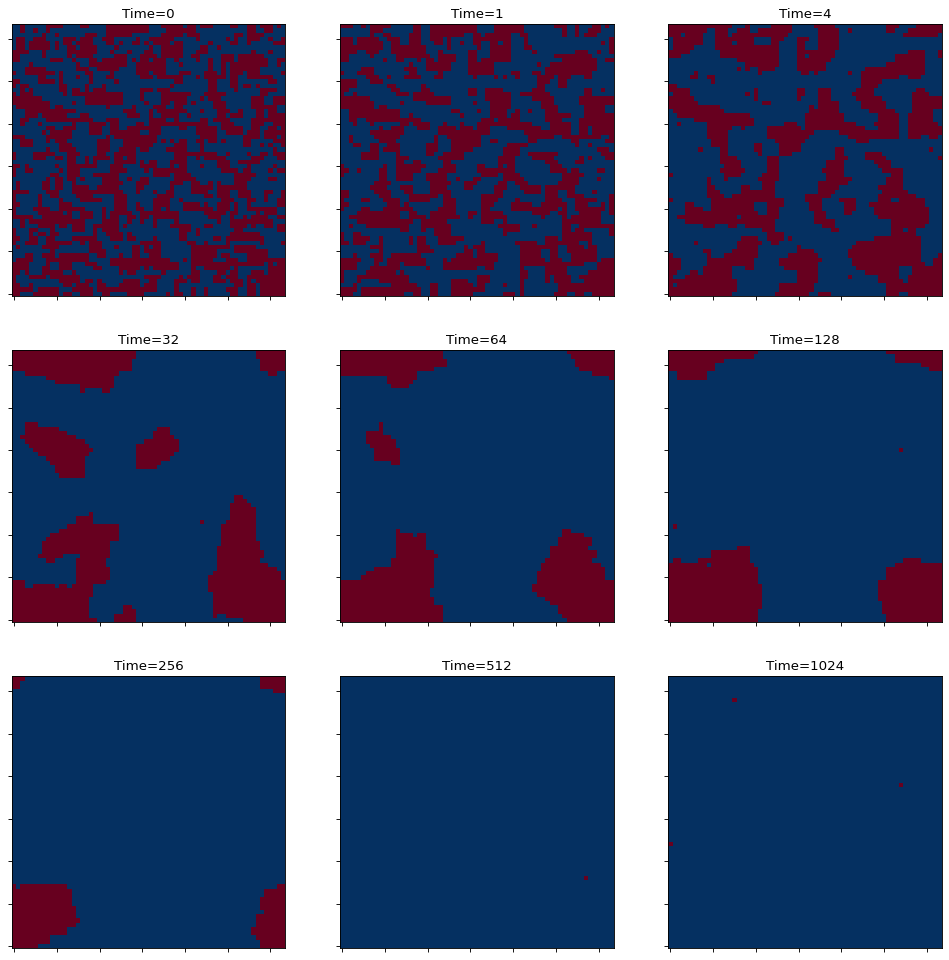

In [26]:
IsingModel.visualization()